<a href="https://colab.research.google.com/github/Tiago-Lima/CreditRiskStudy/blob/main/CreditRisk_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB # Gaussian é uma distribuição estatística, mais usado para problemas genéricos.

##Base risco de crédito


In [6]:
base_risco_credito = pd.read_csv('data/risco_credito.csv')

In [7]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [8]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [9]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder #Biblioteca para conerter atributos categóricos
label_encoder_historia = LabelEncoder() #Instanciando variáveis de cada coluna
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [11]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
import pickle
with open('data/risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [13]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [14]:
# História= Boa , Dívida=Alta, Garantias = Nenhuma, Renda>=35 -----> (0,0,1,2)
# História= Ruim , Dívida=Alta, Garantias = Adequada, Renda<=15 ---> (2,0,0,0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]]) # O próprio algoritmo já faz a correção laplaciana
previsao

array(['baixo', 'moderado'], dtype='<U8')

###Resultado###

Os valores bateram com as previsões calculadas manualmente na tabela de probabilidade. Repare que a previsão retorna somente as classes, não retornou o valor da probabilidade.


In [15]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [16]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [17]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

Acima estão as probabilidades apriori.


*   Alto = 42% da base de dados
*   Baixo = 35% da base de dados
* Moderado = 21% da base de dados





##Base Credit Data

In [18]:
with open ('data/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [19]:
X_credit_treinamento.shape , y_credit_treinamento.shape

((1500, 3), (1500,))

In [20]:
X_credit_teste.shape , y_credit_teste.shape

((500, 3), (500,))

In [21]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [23]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [24]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Verificando o resultado das previsões

In [26]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [27]:
accuracy_score(y_credit_teste, previsoes)

0.938

Tivemos um percentual de acerto de 93%

In [28]:
confusion_matrix(y_credit_teste , previsoes) #Matriz de confusão

array([[428,   8],
       [ 23,  41]])

Na primeira linha ela mostra 428 clientes que pagam o empréstimo que foram classificados corretamente, e 8 clientes que pagam que foram classificados incorretamente. Na segunda são 41 clientes que não pagam o empréstimo que foram classificados corretamente, 23 que não pagam que foram classificados incorretamente.

In [29]:
from yellowbrick.classifier import ConfusionMatrix  ## Exemplo para facilitar o exemplo da matriz de treinamento

0.938

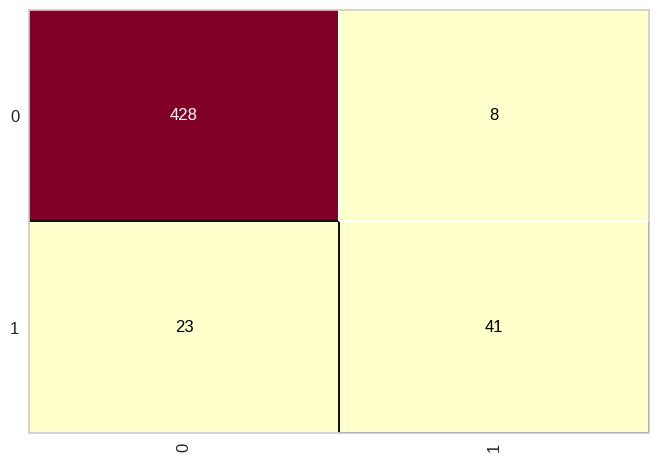

In [30]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Repare na intersecção da matriz, registros 0 com 0 são os que 'bateram corretamente.


In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_credit_teste, previsoes) # Esse report mostra que o algoritmo identifica bem quem paga o empréstimo porém não tão bem quem não paga
print(report)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



##Base census

In [36]:
import pickle
with open ('data/census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [37]:
X_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [38]:
X_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [39]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [40]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

### Verificando o resultado das previsões

In [41]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

Taxa de acerto menor que 50%¨, mais fácil tirar no cara ou coroa

0.4767656090071648

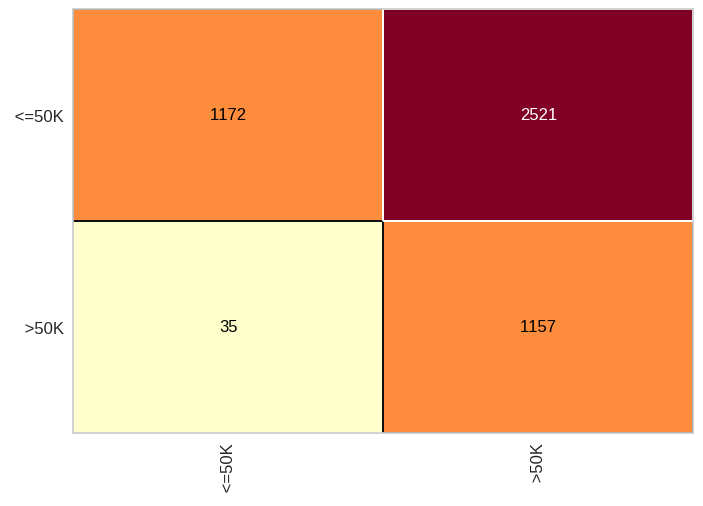

In [42]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [43]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



### Explicação do report fornecida pelo ChatGPT

O resultado do `classification_report` apresenta várias métricas de avaliação de desempenho de um modelo de classificação binária (duas classes: `<=50K` e `>50K`) com base nas previsões do modelo e nos rótulos verdadeiros. Aqui está uma explicação das métricas mostradas:

1. **Precision (Precisão)**: A precisão mede a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas. É calculada da seguinte forma para cada classe:
   
   - Para a classe `<=50K`: 0.97 (ou seja, 97% das previsões para esta classe estão corretas).
   - Para a classe `>50K`: 0.31 (ou seja, apenas 31% das previsões para esta classe estão corretas).

2. **Recall (Revocação ou Sensibilidade)**: A revocação mede a proporção de verdadeiros positivos (TP) em relação ao total de casos verdadeiros positivos na amostra. É calculada da seguinte forma para cada classe:

   - Para a classe `<=50K`: 0.32 (ou seja, o modelo captura 32% dos casos reais desta classe).
   - Para a classe `>50K`: 0.97 (ou seja, o modelo captura 97% dos casos reais desta classe).

3. **F1-Score (F1-Pontuação)**: A pontuação F1 é a média harmônica entre precisão e revocação. É útil quando você deseja encontrar um equilíbrio entre precisão e revocação. É calculada da seguinte forma para cada classe:

   - Para a classe `<=50K`: 0.48
   - Para a classe `>50K`: 0.48

4. **Support (Suporte)**: O suporte é o número de amostras verdadeiras para cada classe no conjunto de teste.

   - Para a classe `<=50K`: 3693
   - Para a classe `>50K`: 1192

5. **Acurácia (Accuracy)**: A acurácia mede a proporção de todas as previsões corretas em relação ao total de previsões feitas pelo modelo. É calculada da seguinte forma:

   - Acurácia: 0.48 (ou seja, 48% das previsões estão corretas).

6. **Média Ponderada (Weighted Avg)**: É a média ponderada das métricas de precisão, revocação e pontuação F1, levando em consideração o suporte de cada classe. Neste caso, a média ponderada das métricas é calculada para as duas classes e dá peso maior à classe com maior suporte.

   - Precisão ponderada: 0.81
   - Revocação ponderada: 0.48
   - F1-Pontuação ponderada: 0.48

O resumo do `classification_report` fornece informações detalhadas sobre o desempenho do modelo em cada classe individualmente, bem como uma visão geral geral do desempenho do modelo. No seu caso, o modelo parece ter um desempenho razoável na classe `<=50K`, mas um desempenho muito baixo na classe `>50K`, conforme indicado pelo baixo valor de precisão para esta classe. É importante ajustar o modelo ou os hiperparâmetros para melhorar o desempenho, especialmente na classe com menor precisão.